### Importing the libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')


In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Get the categorical columns that have less than 10 unique values

In [5]:
target='Survived'
cat_cols=[cols for cols in train.columns if train[cols].nunique()<10 and cols != target]
cat_cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Get the numerical columns

In [6]:
num_cols=[]
for cols in train.columns:
    if train[cols].dtype in ['int64','float64'] and cols != target and cols not in cat_cols:
        num_cols.append(cols)
num_cols

['PassengerId', 'Age', 'Fare']

Visualizing the missing data in the training data using heatmap

<Axes: >

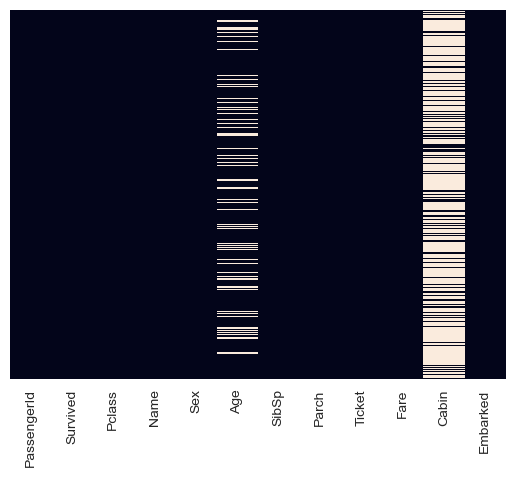

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

We have missing values in the Age and Cabin columns

Calculate the percentage of missing values in the Age and Cabin columns


In [8]:
age_missing=train['Age'].isnull().sum()/train.shape[0]*100
cabin_missing=train['Cabin'].isnull().sum()/train.shape[0]*100
print(f'Age missing values: {age_missing:.2f}%')
print(f'Cabin missing values: {cabin_missing:.2f}%')

Age missing values: 19.87%
Cabin missing values: 77.10%


Visualizing the missing data in the test data using heatmap

<Axes: >

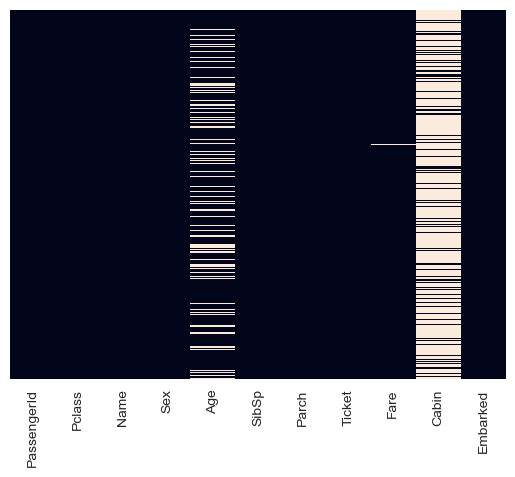

In [9]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

We have an extra missing value in the Fare column in the test data

<Axes: >

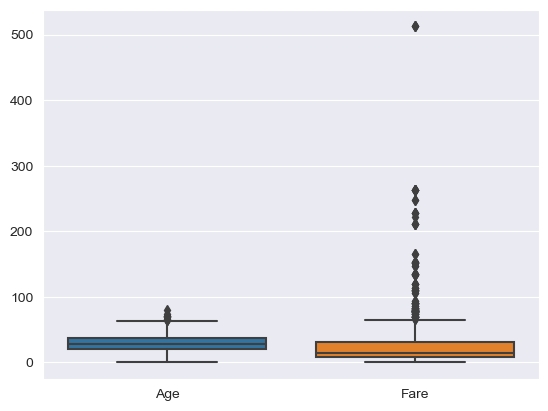

In [10]:
sns.boxplot(train[[cols for cols in num_cols if cols != 'PassengerId' and cols != 'Survived']])

There are a lot of outliers in the Fare feature

Let's fill in the missing values in the Age column with the median

In [11]:
def fill_median(data,feature):
    data[feature].fillna(data[feature].median(),inplace=True)
fill_median(train,'Age')
fill_median(test,'Age')
fill_median(test,'Fare') #This could pose a problem as it may not align with the Pclass

Let's drop the Cabin column as it has a lot of missing values

In [12]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

Let's look at our heatmaps again

<Axes: >

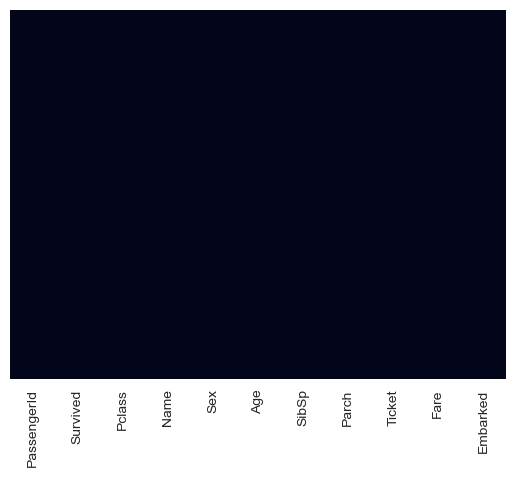

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<Axes: >

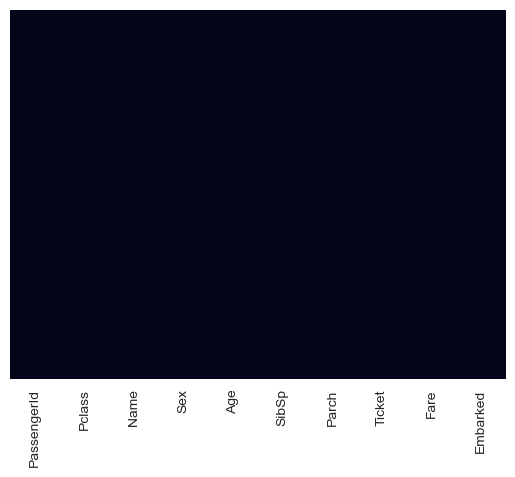

In [14]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

No more missing values in both the training and test data

In [15]:
train.isnull().sum()
train.fillna(train['Embarked'].mode()[0],inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Find the Age distribution of the passengers that survived

<Axes: xlabel='Age', ylabel='Count'>

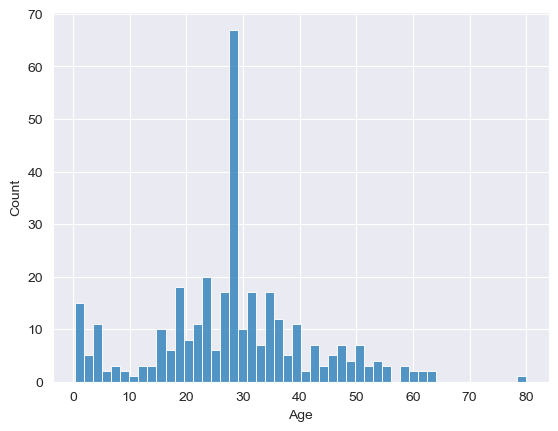

In [17]:
sns.histplot(train.query('Survived==1')['Age'],bins=50)

Plot the number of passengers that survived based on their Ticket Class

<Axes: xlabel='Pclass', ylabel='count'>

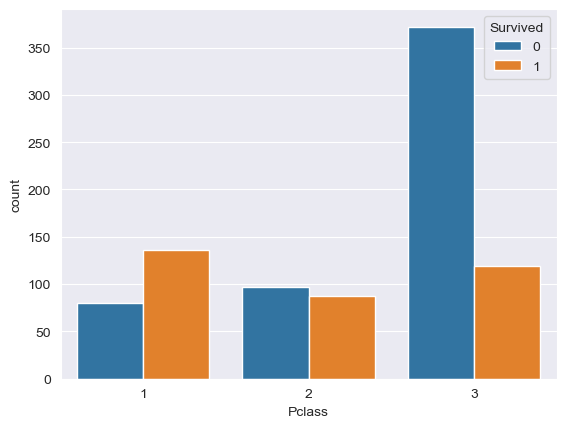

In [18]:
sns.countplot(x='Pclass',data=train,hue='Survived')

Convert the categorical columns to numerical columns using Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ord_cat=['Pclass','SibSp','Parch'] #Ordinal categorical columns
nom_cat=[cols for cols in cat_cols if cols not in ord_cat] #Nominal categorical columns
encoder=OneHotEncoder(sparse=False)
OneHotEncoded=encoder.fit_transform(train[nom_cat])
one_hot_df = pd.DataFrame(OneHotEncoded, columns=encoder.get_feature_names_out(nom_cat))
train=pd.concat([train,one_hot_df],axis=1)
train.drop(nom_cat,axis=1,inplace=True)
OneHotEncoded=encoder.fit_transform(test[nom_cat])
one_hot_df = pd.DataFrame(OneHotEncoded, columns=encoder.get_feature_names_out(nom_cat))
test=pd.concat([test,one_hot_df],axis=1)
test.drop(nom_cat,axis=1,inplace=True)
le=LabelEncoder()
for cols in ord_cat:
        train[cols]=le.fit_transform(train[cols])
        test[cols]=le.fit_transform(test[cols])
train.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,2,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,2,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,2,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1.0,0.0,0.0,1.0


In [20]:
class_counts=train['Survived'].value_counts()
print(class_counts)
print(f'The balance ratio of the dataset is: {min(class_counts)/max(class_counts):.2f}')

Survived
0    549
1    342
Name: count, dtype: int64
The balance ratio of the dataset is: 0.62


The dataset is not severely imbalanced

Split the training data into features and target

In [21]:
y=train['Survived']
X=train.drop(['Survived','PassengerId','Name','Ticket'],axis=1)
X_res=test.drop(['PassengerId','Name','Ticket'],axis=1)
X_res.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,2,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,2,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,1,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,2,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,2,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (623, 10)
Test data shape: (268, 10)


Create a grid of parameters to search over

In [23]:
params={'penalty':['l2'],
        'C':np.logspace(-4,4,20), #Numbers spaced evenly on a log scale
        'solver':['saga','liblinear','newton-cg','lbfgs','sag'],
        'max_iter':[2500,5000,10000],
        }


Create a Pipeline to scale the numerical features and run gridsearch on a model

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model=Pipeline([
    ('scaler',StandardScaler()),
    ('gridsearch',GridSearchCV(LogisticRegression(),params,cv=10,verbose=True,n_jobs=-1,refit=True))
])
model.fit(X_train,y_train)
model['gridsearch'].best_estimator_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


LogisticRegression(C=0.004832930238571752, max_iter=2500, solver='saga')

In [25]:
print(f'Training score: {model.score(X_train,y_train)}')

Training score: 0.8170144462279294


Check the model's performance on the test data

In [26]:
print(f'Test score: {model.score(X_test,y_test)}')

Test score: 0.8059701492537313


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,model.predict(X_train))

array([[363,  29],
       [ 85, 146]])

Trying for Decision Tree Classifier

In [28]:
params={'max_depth':np.arange(2,10),
        'min_samples_split':np.arange(2,10),
        'min_samples_leaf':np.arange(2,10),
        'criterion':['gini','entropy'],
        }

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=Pipeline([
    ('scaler',StandardScaler()),
    ('gridsearch',GridSearchCV(DecisionTreeClassifier(),params,cv=4,verbose=True,n_jobs=-1,refit=True))
])
model.fit(X_train,y_train)
model['gridsearch'].best_estimator_

Fitting 4 folds for each of 1024 candidates, totalling 4096 fits


DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3)

In [30]:
print(f'Training score: {model.score(X_train,y_train)}')

Training score: 0.8651685393258427


In [31]:
print(f'Test score: {model.score(X_test,y_test)}')

Test score: 0.7947761194029851


Using XGBoost

In [32]:
from xgboost import XGBClassifier
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [33]:
model=Pipeline([
    ('scaler',StandardScaler()),
    ('gridsearch',GridSearchCV(XGBClassifier(),params,scoring='accuracy',cv=5,verbose=3,n_jobs=-1,refit=True))
])
model.fit(X_train,y_train)
model['gridsearch'].best_params_

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1;, score=0.904 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3;, score=0.750 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.784 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1;, score=0.904 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.766 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.871 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.792 total time=   0.0s
[CV 2/5] END cols

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5}

In [34]:
classifier=XGBClassifier(colsample_bytree= 0.5,gamma= 0.0,learning_rate=0.3,max_depth= 4,min_child_weight= 5)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
print(f'Training score: {classifier.score(X_train,y_train)}')


Training score: 0.9036918138041734


In [36]:
print(f'Test score: {classifier.score(X_test,y_test)}')

Test score: 0.832089552238806


In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [38]:
print(f'Cross validation score: {score.mean()}')

Cross validation score: 0.8249313358302122


In [39]:
classifier.fit(X_train,y_train)
X_train.columns
X_res.columns
# X.columns
# X_res.columns
y_res=(classifier.predict(X_res))
# y_res
# test.shape

In [40]:
output=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_res})
output.to_csv('submission_xgboost_new_preproc.csv',index=False)